2023/3/6<br>
This code is for result visualization

In [1]:
import os
import cv2
import glob
import copy
import common.Watershed_func
import numpy as np
import mahotas as mh
import matplotlib.pyplot as plt
import matplotlib.patches as pat
from tqdm import tqdm
from scipy import stats
from matplotlib.patches import Rectangle
from matplotlib.gridspec import GridSpec
from sklearn.neighbors import KernelDensity
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
current_path=os.getcwd()
npz_path=os.path.join(current_path, "npz_file")
npz_pred_path=os.path.join(npz_path, "pred_im_concatenation")
npz_segmentation_path=os.path.join(npz_path, "segmentation")
fig_save_path=os.path.join(current_path, "fig_save", "result_visualization")

if os.path.exists(fig_save_path)==False:
    os.makedirs(fig_save_path)
    
Polscope_x40=0.160256 #um/pixel
scaling_list=[Polscope_x40**2, Polscope_x40, 1, 1, 1, Polscope_x40**2, Polscope_x40, 1, 1, 1,  Polscope_x40**2, 1, 1, 1, 1, 1, 1, 1]

In [3]:
npz_path_list=glob.glob(os.path.join(npz_pred_path, "*.npz"))
npz_segmentation_path_list=glob.glob(os.path.join(npz_segmentation_path, "*.npz"))

npz_list=[]
for npz_path_ in npz_path_list:
    npz=np.load(npz_path_)
    npz_list.append(npz)
    
npz_segmentation_list=[]
for npz_segmentation_path in npz_segmentation_path_list:
    npz_segmentation=np.load(npz_segmentation_path)
    npz_segmentation_list.append(npz_segmentation)
    
npz=np.load(os.path.join(npz_path, "Dataframe_CWT_MFA_anatomy.npz"), allow_pickle=True)
df_list=npz["df_list"]

Result visualization of each cell species (sample02_EW)

In [4]:
#load data
MFA=npz_list[2]["MFA"]
angle=npz_list[2]["angle"]
pred_binary=npz_list[2]["pred_binary"]
nuclei=npz_segmentation_list[2]["nuclei"]

watershed segmentation

In [5]:
target_gt=glob.glob(os.path.join(current_path, "manual_correction", "sample02_EW", "*.png"))
gt_im=cv2.imread(target_gt[0], -1)
gt_im=cv2.cvtColor(gt_im, cv2.COLOR_BGR2GRAY)
gt_im=cv2.bitwise_not(gt_im)

watershed=common.Watershed_func.watershed()
nuclei, lines=watershed.watershed_segmentation(gt_im)
nuclei_ = mh.labeled.remove_bordering(nuclei)

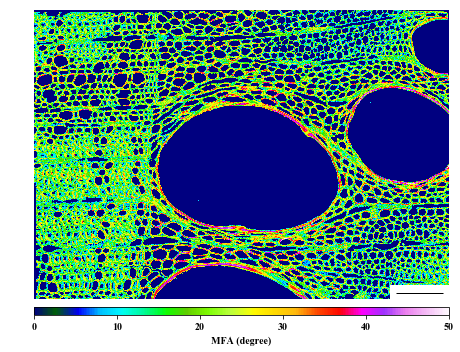

In [6]:
plt.rcParams['font.family']="Times New Roman"
fig, ax=plt.subplots(1, 1, figsize=(7, 5))
im=ax.imshow(MFA[:, :5500], cmap="gist_ncar", vmin=0, vmax=50)
ax.axis("off")
ax.add_patch(Rectangle((4720, 3650), 1500, 1000, facecolor="w", edgecolor="w"))
ax.add_patch(Rectangle((4800, 3750), 100//Polscope_x40, 8, facecolor="k", edgecolor="k"))
divider = make_axes_locatable(ax)
cax = divider.append_axes("bottom", size="3%", pad=0.1)
fig.colorbar(im, cax=cax, label="MFA (degree)", orientation="horizontal")

plt.tight_layout()
plt.savefig(os.path.join(fig_save_path, "sample02_EW_MFA_map.png"), dpi=1200)
plt.show()
plt.close()

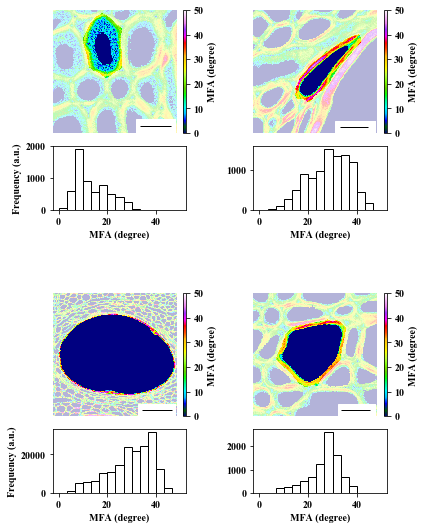

In [11]:
#867 latewood vessel 867
#1232 earlywood 1232
#291 fiber
#1141 vasicentric tracheid

fig, ax = plt.subplots(figsize=(6, 9))
gs = GridSpec(7, 2, wspace=0.5, hspace=0.1)
ax1 = plt.subplot(gs[0:2, 0])
ax2 = plt.subplot(gs[0:2, 1])
ax3 = plt.subplot(gs[2, 0])
ax4 = plt.subplot(gs[2, 1])

ax5 = plt.subplot(gs[4:6, 0])
ax6 = plt.subplot(gs[4:6, 1])
ax7 = plt.subplot(gs[6, 0])
ax8 = plt.subplot(gs[6, 1])

fiber=np.where(nuclei==291, MFA, np.nan)
ax1.imshow(MFA[280:530, 4750:5000], cmap="gist_ncar", vmin=0, vmax=50, alpha=0.3)
im0=ax1.imshow(fiber[280:530, 4750:5000], cmap="gist_ncar", vmin=0, vmax=50, alpha=1)
ax1.axis("off")
ax1.add_patch(Rectangle((170, 220), 100, 100, facecolor="w", edgecolor="w"))
ax1.add_patch(Rectangle((178, 235), 10//Polscope_x40, 1, facecolor="k", edgecolor="k"))
divider = make_axes_locatable(ax1)
cax = divider.append_axes("right", size="3%", pad=0.1)
fig.colorbar(im, cax=cax, label="MFA (degree)")

vasi_tracheid=np.where(nuclei==1141, MFA, np.nan)
ax2.imshow(MFA[1050:1450, 4000:4400],  cmap="gist_ncar", vmin=0, vmax=50, alpha=0.3)
im1=ax2.imshow(vasi_tracheid[1050:1450, 4000:4400],  cmap="gist_ncar", vmin=0, vmax=50, alpha=1.0)
ax2.axis("off")
ax2.add_patch(Rectangle((265, 360), 1500, 1000, facecolor="w", edgecolor="w"))
ax2.add_patch(Rectangle((280, 380), 15//Polscope_x40, 1, facecolor="k", edgecolor="k"))
divider = make_axes_locatable(ax2)
cax = divider.append_axes("right", size="3%", pad=0.1)
fig.colorbar(im, cax=cax, label="MFA (degree)")

ax3.hist(fiber[280:530, 4750:5000].flatten(), bins=15, range=(0.01, 50), color="white", edgecolor="black")
ax3.set_ylabel("Frequency (a.u.)")
ax3.set_xlabel("MFA (degree)")
ax4.hist(vasi_tracheid[1050:1450, 4000:4400].flatten(), bins=15, range=(0.01, 50), color="white", edgecolor="black")
ax4.set_xlabel("MFA (degree)")
#ax[0, 1].set_xlabel("MFA (degree)")


early_vessel=np.where(nuclei==1232, MFA, np.nan)
ax5.imshow(MFA[800:3400, 1500:4100], cmap="gist_ncar", vmin=0, vmax=50, alpha=0.3)
im2=ax5.imshow(early_vessel[800:3400, 1500:4100], cmap="gist_ncar", vmin=0, vmax=50, alpha=1.0)
ax5.axis("off")
ax5.add_patch(Rectangle((1800, 2350), 1500, 1000, facecolor="w", edgecolor="w"))
ax5.add_patch(Rectangle((1900, 2470), 100//Polscope_x40, 2, facecolor="k", edgecolor="k"))
divider = make_axes_locatable(ax5)
cax = divider.append_axes("right", size="3%", pad=0.1)
fig.colorbar(im, cax=cax, label="MFA (degree)")

late_vessel=np.where(nuclei==867, MFA, np.nan)
ax6.imshow(MFA[750:1150, 950:1350], cmap="gist_ncar", vmin=0, vmax=50, alpha=0.3)
im3=ax6.imshow(late_vessel[750:1150, 950:1350], cmap="gist_ncar", vmin=0, vmax=50, alpha=1.0)
ax6.axis("off")
ax6.add_patch(Rectangle((275, 360), 1500, 1000, facecolor="w", edgecolor="w"))
ax6.add_patch(Rectangle((285, 378), 15//Polscope_x40, 1, facecolor="k", edgecolor="k"))
divider = make_axes_locatable(ax6)
cax = divider.append_axes("right", size="3%", pad=0.1)
fig.colorbar(im, cax=cax, label="MFA (degree)")

ax7.hist(early_vessel[800:3400, 1500:4100].flatten(), bins=15, range=(0.01, 50), color="white", edgecolor="black")
ax7.set_xlabel("MFA (degree)")
ax7.set_ylabel("Frequency (a.u.)")
ax8.hist(late_vessel[750:1150, 950:1350].flatten(), bins=15, range=(0.01, 50), color="white", edgecolor="black")
ax8.set_xlabel("MFA (degree)")

plt.tight_layout()
plt.savefig(os.path.join(fig_save_path, "sample02_EW_MFA_map_hist_fiber_vasicentric-tracheid_early_late-vessel.png"), dpi=1200)
plt.show()
plt.close()

sample23 LW (Acer nipponicum)

In [12]:
#load data
MFA=npz_list[-3]["MFA"]
angle=npz_list[-3]["angle"]
pred_binary=npz_list[-3]["pred_binary"]
nuclei=npz_segmentation_list[-3]["nuclei"]

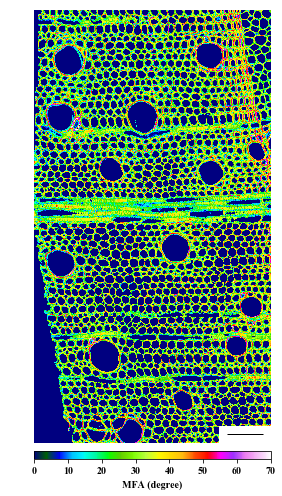

In [23]:
plt.rcParams['font.family']="Times New Roman"

fig, ax = plt.subplots(1, 1, figsize=(5, 7))
im=ax.imshow(MFA, cmap="gist_ncar", vmin=0, vmax=70)
ax.axis("off")
divider = make_axes_locatable(ax)
cax = divider.append_axes("bottom", size="2%", pad=0.1)
fig.colorbar(im, cax=cax, orientation='horizontal', label="MFA (degree)")
ax.add_patch(Rectangle((2400, 5400), 1500, 1000, facecolor="w", edgecolor="w"))
ax.add_patch(Rectangle((2500, 5510), 75//Polscope_x40, 4, facecolor="k", edgecolor="k"))
plt.tight_layout()
plt.savefig(os.path.join(fig_save_path, "sample23_LW_MFA_map.png"), dpi=1200)
plt.show()
plt.close()

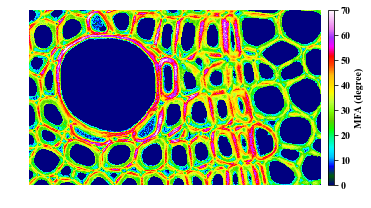

In [71]:
fig, ax = plt.subplots(1, 1, figsize=(6, 3))
im=ax.imshow(MFA[350:950, 2000:3000], cmap="gist_ncar", vmin=0, vmax=70)
ax.axis("off")
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="2%", pad=0.1)
fig.colorbar(im, cax=cax, label="MFA (degree)")

plt.tight_layout()
plt.savefig(os.path.join(fig_save_path, "sample23_LW_MFA_map_expand.png"), dpi=1200)
plt.show()
plt.close()

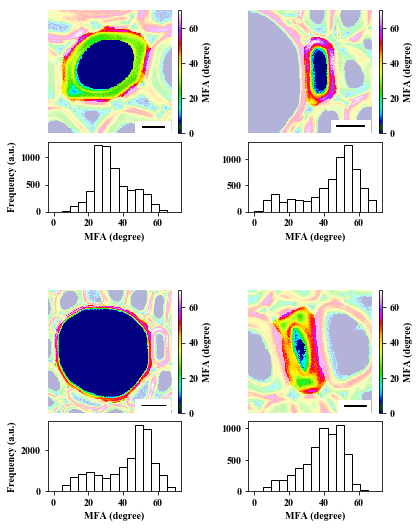

In [58]:
fig, ax = plt.subplots(figsize=(6, 9))
gs = GridSpec(7, 2, wspace=0.5, hspace=0)
ax1 = plt.subplot(gs[0:2, 0])
ax2 = plt.subplot(gs[0:2, 1])
ax3 = plt.subplot(gs[2, 0])
ax4 = plt.subplot(gs[2, 1])

ax5 = plt.subplot(gs[4:6, 0])
ax6 = plt.subplot(gs[4:6, 1])
ax7 = plt.subplot(gs[6, 0])
ax8 = plt.subplot(gs[6, 1])

fiber=np.where(nuclei==545, MFA, np.nan)
ax1.imshow(MFA[770:940, 2230:2400], cmap="gist_ncar", vmin=0, vmax=70, alpha=0.3)
im0=ax1.imshow(fiber[770:940, 2230:2400], cmap="gist_ncar", vmin=0, vmax=70, alpha=1)
ax1.axis("off")
divider = make_axes_locatable(ax1)
cax = divider.append_axes("right", size="3%", pad=0.1)
fig.colorbar(im, cax=cax, label="MFA (degree)")
ax1.add_patch(Rectangle((120, 152), 1500, 1000, facecolor="w", edgecolor="w"))
ax1.add_patch(Rectangle((130, 160), 5//Polscope_x40, 1, facecolor="k", edgecolor="k"))

ax_par=np.where(nuclei==375, MFA, np.nan)
ax2.imshow(MFA[450:720, 2320:2590],  cmap="gist_ncar", vmin=0, vmax=70, alpha=0.3)
im1=ax2.imshow(ax_par[450:720, 2320:2590],  cmap="gist_ncar", vmin=0, vmax=70, alpha=1.0)
ax2.axis("off")
divider = make_axes_locatable(ax2)
cax = divider.append_axes("right", size="3%", pad=0.1)
fig.colorbar(im, cax=cax, label="MFA (degree)")
ax2.add_patch(Rectangle((180, 240), 1500, 1000, facecolor="w", edgecolor="w"))
ax2.add_patch(Rectangle((192, 252), 10//Polscope_x40, 1, facecolor="k", edgecolor="k"))

ax3.hist(fiber[300:900, 2000:2800].flatten(), bins=15, range=(0.01, 70), color="white", edgecolor="black")
ax3.set_ylabel("Frequency (a.u.)")
ax3.set_xlabel("MFA (degree)")
ax4.hist(ax_par[300:900, 2000:2800].flatten(), bins=15, range=(0.01, 70), color="white", edgecolor="black")
ax4.set_xlabel("MFA (degree)")
#ax[0, 1].set_xlabel("MFA (degree)")


vessel=np.where(nuclei==327, MFA, np.nan)
ax5.imshow(MFA[375:825, 2070:2520], cmap="gist_ncar", vmin=0, vmax=70, alpha=0.3)
im2=ax5.imshow(vessel[375:825, 2070:2520], cmap="gist_ncar", vmin=0, vmax=70, alpha=1.0)
ax5.axis("off")
divider = make_axes_locatable(ax5)
cax = divider.append_axes("right", size="3%", pad=0.1)
fig.colorbar(im, cax=cax, label="MFA (degree)")
ax5.add_patch(Rectangle((320, 400), 1500, 1000, facecolor="w", edgecolor="w"))
ax5.add_patch(Rectangle((340, 420), 15//Polscope_x40, 2, facecolor="k", edgecolor="k"))

ter_par=np.where(nuclei==493, MFA, np.nan)
ax6.imshow(MFA[720:900, 2660:2840], cmap="gist_ncar", vmin=0, vmax=70, alpha=0.3)
im3=ax6.imshow(ter_par[720:900, 2660:2840], cmap="gist_ncar", vmin=0, vmax=70, alpha=1.0)
ax6.axis("off")
divider = make_axes_locatable(ax6)
cax = divider.append_axes("right", size="3%", pad=0.1)
fig.colorbar(im, cax=cax, label="MFA (degree)")
ax6.add_patch(Rectangle((130, 160), 1500, 1000, facecolor="w", edgecolor="w"))
ax6.add_patch(Rectangle((140, 168), 5//Polscope_x40, 1, facecolor="k", edgecolor="k"))

ax7.hist(vessel[300:900, 2000:2800].flatten(), bins=15, range=(0.01, 70), color="white", edgecolor="black")
ax7.set_ylabel("Frequency (a.u.)")
ax7.set_xlabel("MFA (degree)")
ax7.set_ylabel("Frequency (a.u.)")
ax8.hist(ter_par[300:900, 2000:2800].flatten(), bins=15, range=(0.01, 70), color="white", edgecolor="black")
ax8.set_xlabel("MFA (degree)")

plt.tight_layout()
plt.savefig(os.path.join(fig_save_path, "sample23_LW_MFA_map_hist_fiber_ax-par_vessel_ter-par.png"), dpi=1200)
plt.show()
plt.close()